In [1]:
import tensorflow as tf
import numpy as np
import os
import sys
import matplotlib 
matplotlib.use('tkagg')
import matplotlib.pyplot as plt
%matplotlib inline
sys.path.append('../')

/home/nakatsuka/anaconda3/envs/tf16/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from cifar.model import CifarCNN
from cifar.dataset import data_init
from attention_cnn import visualize

../attention_cnn.py:8: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/nakatsuka/anaconda3/envs/tf16/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/nakatsuka/anaconda3/envs/tf16/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/nakatsuka/.local/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/nakatsuka/anaconda3/envs/tf16/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/nakatsuka/.local/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loo

In [3]:
model = CifarCNN((32, 32, 3),
                 nb_classes=10)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [4]:
model.restore('../../logs/debug_2/epoch_100/model.ckpt')

INFO:tensorflow:Restoring parameters from ../../logs/debug_2/epoch_100/model.ckpt


In [5]:
test_x, test_y = data_init(mode='test')

In [6]:
test_x.shape

(10000, 32, 32, 3)

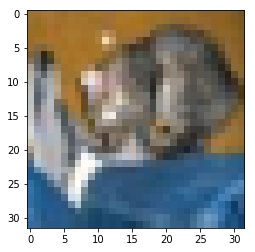

In [7]:
plt.imshow(test_x[0])

In [8]:
x = np.expand_dims(test_x[0], 0)

In [9]:
pred, atts = model.predict_on_batch(x)

In [15]:
atts = [a[0] for a in atts]

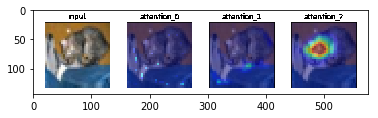

In [22]:
plt.imshow(visualize(x[0], atts, vmin=0., vmax=0.2))

In [23]:
pred, atts = model.predict_on_batch(test_x[:32])    

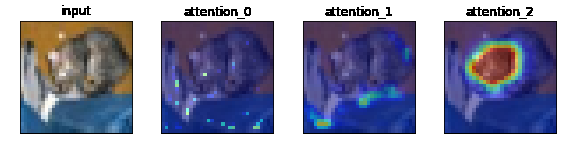

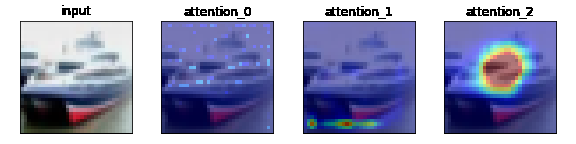

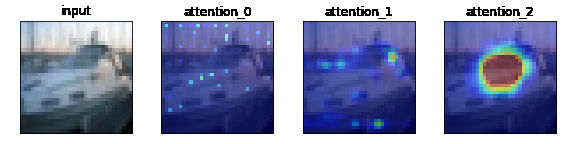

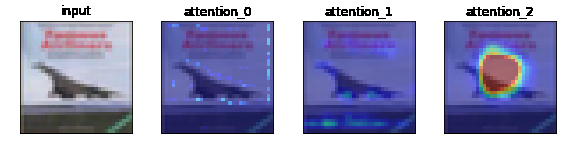

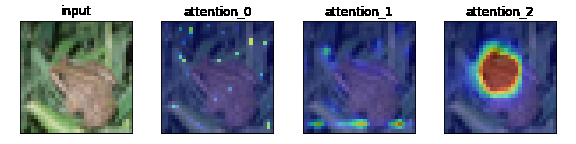

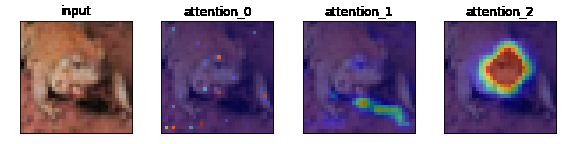

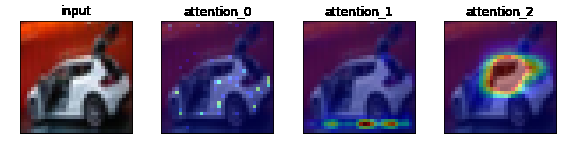

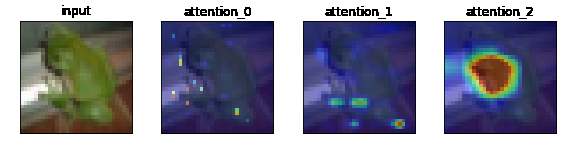

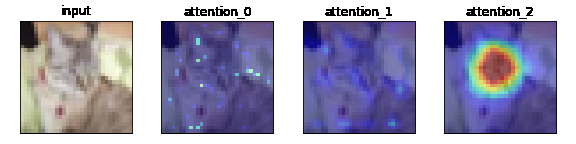

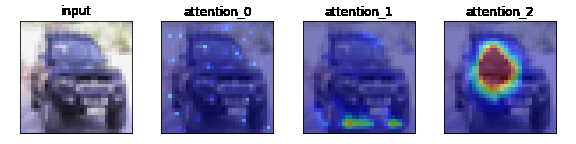

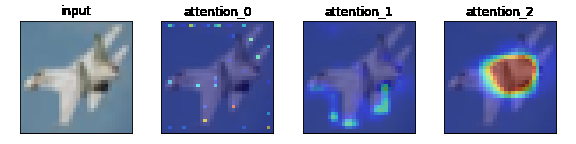

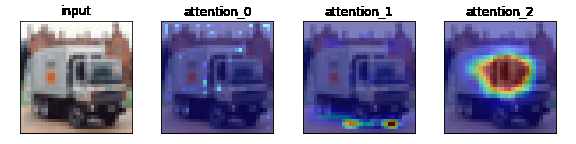

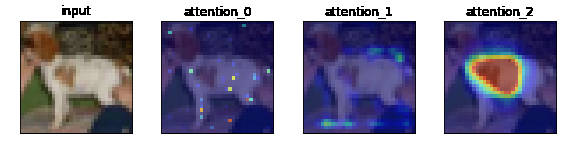

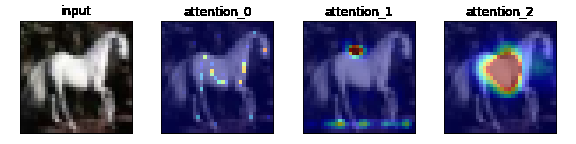

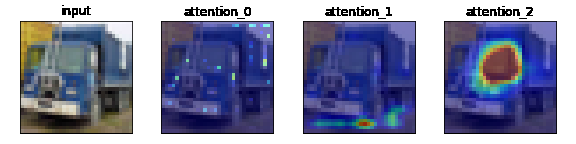

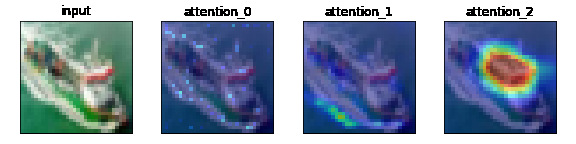

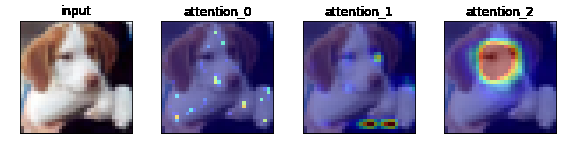

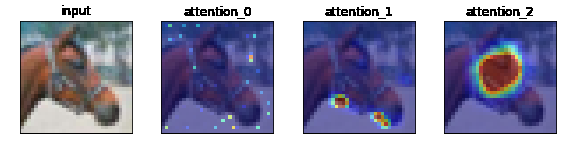

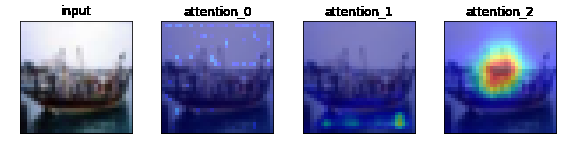

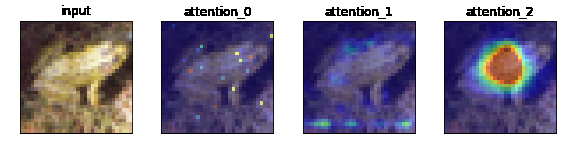

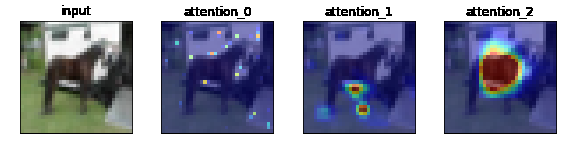

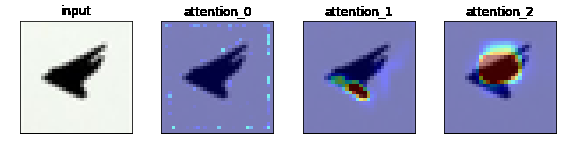

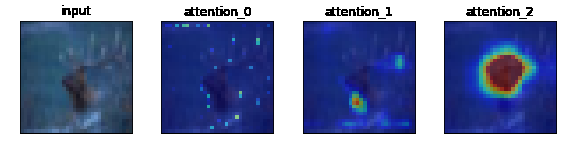

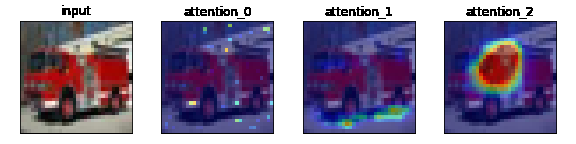

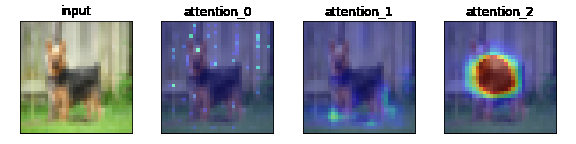

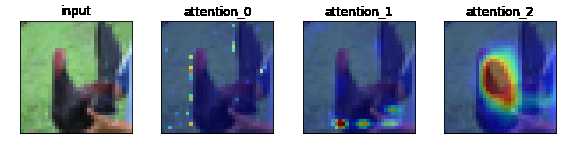

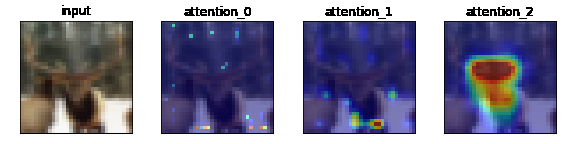

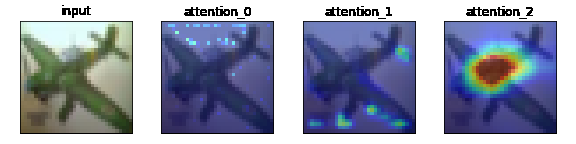

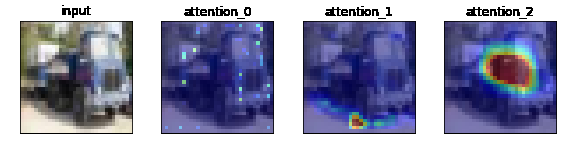

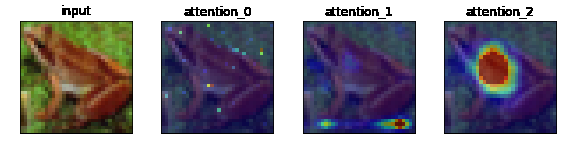

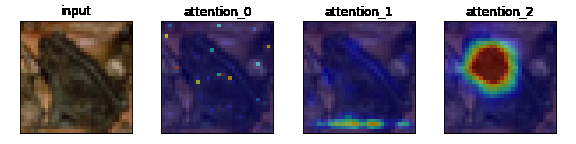

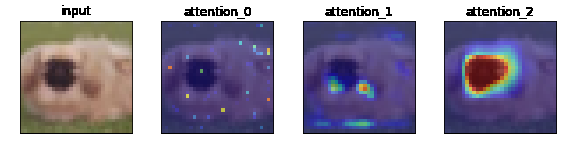

<Figure size 432x288 with 0 Axes>

In [47]:
from IPython.display import Image, display
import PIL
for i, res in enumerate(zip(test_x[:32], pred, *atts)):
    x = res[0] 
    p = res[1]
    a = res[2:]
    fig = visualize(x, a, vmin=0., vmax=0.1, dst_path='%d.png' % i)
    im = PIL.Image.fromarray(fig)
    display(im)